In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [2]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [3]:
def create_dataset_01():
    def line0(x):
        return (x, 10 - x ** 2 + (random() - 0.5))

    Points = []
    for _ in range(1000):
        x = 5 * (random() - 0.5)
        point = line0(x)
        Points.append(point)

    def line1(x):
        return (x, 5 * random() + ((x) * (x - 8)) + 5)

    for _ in range(1000):
        x = 5 * (random() + .1)
        point = line1(x)
        Points.append(point)

    Points = np.array(Points)
    return np.vstack(
        [
            Points,
            np.random.multivariate_normal((5, 5), [[1, 0], [0, 1]], 100)
        ])

In [4]:
dataset1 = create_dataset_00()
dataset2 = create_dataset_01()
train1, test1 = train_test_split(dataset1, test_size=0.2)
train2, test2 = train_test_split(dataset2, test_size=0.2)

/Users/DanWang/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  app.launch_new_instance()


### K Means


In [53]:
def kmeanstest(train1, test1, n_clusters=4): # here k can only equal to 3/4
    kmeans = KMeans(n_clusters, random_state=0).fit(train1)
    predict1 = kmeans.predict(test1)
    table1 = np.concatenate((test1[:,0][:,None],test1[:,1][:,None], predict1[:,None]), axis =1)
    table_0 = table1[table1[:,2] == 0]
    table_1 = table1[table1[:,2] == 1]
    table_2 = table1[table1[:,2] == 2]
    plt.scatter(table_0[:,0], table_0[:,1], c = 'r')
    plt.scatter(table_1[:,0], table_1[:,1], c = 'b')
    plt.scatter(table_2[:,0], table_2[:,1], c = 'g')
    if n_clusters == 4:
        table_3 = table1[table1[:,2] == 3]
        plt.scatter(table_3[:,0], table_3[:,1], c = 'black')

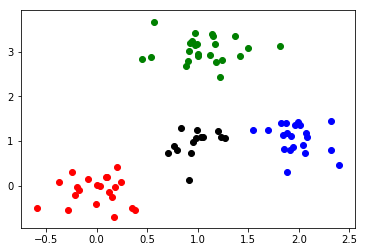

In [56]:
kmeanstest(train1, test1)

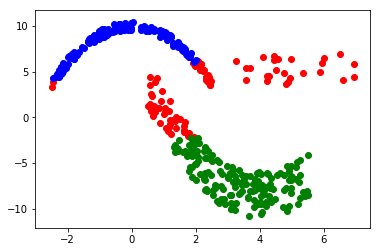

In [57]:
kmeanstest(train2, test2, n_clusters=3)

### DBSCAN

In [94]:
def dbscantest(train1, test1, eps=0.3, n_clusters = 4): # here k can only equal to 3/4
    clustering = DBSCAN(eps, min_samples=4).fit(train1)
    predict1 = clustering.fit_predict(test1)
    table1 = np.concatenate((test1[:,0][:,None],test1[:,1][:,None], predict1[:,None]), axis =1)
    table_0 = table1[table1[:,2] == 0]
    table_1 = table1[table1[:,2] == 1]
    table_2 = table1[table1[:,2] == 2]
    plt.scatter(table_0[:,0], table_0[:,1], c = 'r')
    plt.scatter(table_1[:,0], table_1[:,1], c = 'b')
    plt.scatter(table_2[:,0], table_2[:,1], c = 'g')
    if n_clusters == 4:
        table_3 = table1[table1[:,2] == 3]
        plt.scatter(table_3[:,0], table_3[:,1], c = 'black')
clustering = DBSCAN(eps=0.35, min_samples=4).fit(train1)


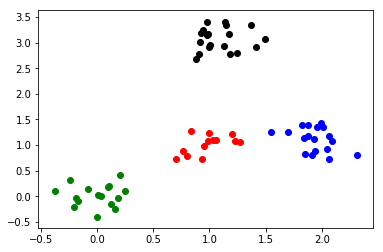

In [95]:
dbscantest(train1, test1)

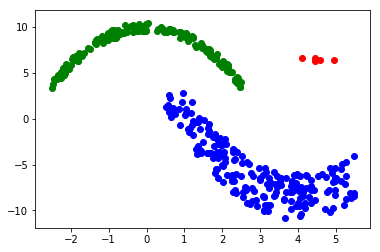

In [114]:
dbscantest(train2, test2, eps=0.8, n_clusters=3)

### SpectralClustering

In [6]:
def spectest(train1, test1, n_clusters=4): # here k can only equal to 3/4
    #kmeans = KMeans(n_clusters, random_state=0).fit(train1)
    Spect = SpectralClustering(n_clusters).fit(train1)
    predict1 = Spect.fit_predict(test1)
    table1 = np.concatenate((test1[:,0][:,None],test1[:,1][:,None], predict1[:,None]), axis =1)
    table_0 = table1[table1[:,2] == 0]
    table_1 = table1[table1[:,2] == 1]
    table_2 = table1[table1[:,2] == 2]
    plt.scatter(table_0[:,0], table_0[:,1], c = 'r')
    plt.scatter(table_1[:,0], table_1[:,1], c = 'b')
    plt.scatter(table_2[:,0], table_2[:,1], c = 'g')
    if n_clusters == 4:
        table_3 = table1[table1[:,2] == 3]
        plt.scatter(table_3[:,0], table_3[:,1], c = 'black')

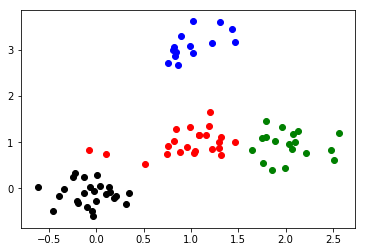

In [7]:
spectest(train1, test1)

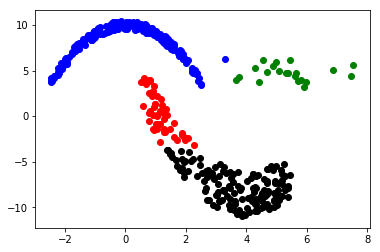

In [8]:
spectest(train2, test2)